In [ ]:
!pip install hdbscan

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from load_logs import *
from evaluation import *
from features import *
from visualize import *

In [3]:
from sklearn.metrics.pairwise import pairwise_distances

In [4]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import hdbscan
from sklearn import metrics

In [6]:
# algorithms = ["auto", "ball_tree", "kd_tree", "brute"] 
# leaf_size = [10, 20, 30, 40, 50] 
eps = [0.4, 0.5, 0.6, 0.7, 0.8] #cluster_selection_epsilon parameter for hdbscan
metrics = ["precomputed", "euclidean","manhattan"]
min_samples =  [100, 200, 300, 400, 500] #is it worth it to use the min_sample from DBSCAN and cache using memory?
min_cluster_size = [100, 200, 300, 400, 500]
#cluster_selection_methods=["eom", "leaf"]

In [7]:
def grid_search(logs, gram, min_df):
    
    labels_ = log_labels
            
    X = get_features(logs, gram, min_df)
    X = X.toarray()

    idxs = np.where(np.all(X == 0, axis=1))

    X = np.delete(X, idxs, axis=0)
    labels_ = np.delete(labels_, idxs)

    result_header = ["Eps", "Min Cluster Size", "Min Sample Size", "Metric", "VMeasure", "Fowlkes-Mallows", "Labels"]
    results = []
    
    Y = pairwise_distances(X, metric="cosine")
    
    #using min sample = 100 based off of dbscan results
    
    for metric in metrics:
        for min_cl in min_cluster_size:
            for min_s in min_samples:
                for ep in eps:
                        model = hdbscan.HDBSCAN(min_cluster_size=min_cl,min_samples=min_s,cluster_selection_epsilon=0.5,
                                                metric=metric,algorithm='best')

                        if metric == "precomputed":
                            model.fit(Y)
                        else :
                            model.fit(X)

                        labels = model.labels_

                        vm = evaluate_vmeasure(labels_, labels)
                        fm = evaluate_fm(labels_, labels)

                        lst1 = set(labels)

                        result = [0.5, min_cl, min_s, metric, vm, fm, len(lst1)-1]
                        results.append(result)

                        tab_results(result_header, results) 

                
    tab_results(result_header, results)         

In [ ]:
grid_search(logs, 2, 70)

+-----+------------------+-----------------+-------------+--------------------+--------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |  Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+--------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 | 0.5125188733341353 |   12   |
+-----+------------------+-----------------+-------------+--------------------+--------------------+--------+
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.7301901564619262 |  0.5125188733341353 |   12   |
| 0.5 |       100        |       200       | precomputed | 0.692046289271935  | 0.49389173575761025 |   14   |
| 0.5 |       100        |       300       | precomputed | 0.6736645157783724 |  0.4892557802774804 |   16   |
| 0.5 |       100        |       400       | precomputed | 0.6660478181577291 | 0.48726700234386916 |   16   |
| 0.5 |       100        |       500       | precomputed | 0.7429229903160067 |  0.5864870200597161 |   18   |
| 0.5 |       200        |       100       | precomputed | 0.7293967369638897 |  0.5125858235623394 |   11   |
|

In [8]:
grid_search(logs, 3, 90)

+-----+------------------+-----------------+-------------+--------------------+-------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |  Fowlkes-Mallows  | Labels |
+-----+------------------+-----------------+-------------+--------------------+-------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 | 0.595442603998997 |   14   |
+-----+------------------+-----------------+-------------+--------------------+-------------------+--------+
+-----+------------------+-----------------+-------------+--------------------+--------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |  Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+--------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 | 0.595442603998997  |   14   |
| 0.5 |       1

+-----+------------------+-----------------+-------------+--------------------+--------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |  Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+--------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 | 0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 | 0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 | 0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 | 0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 | 0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 | 0.5953021477410418 |   12   |
| 0.5 |   

+-----+------------------+-----------------+-------------+--------------------+--------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |  Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+--------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 | 0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 | 0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 | 0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 | 0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 | 0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 | 0.5953021477410418 |   12   |
| 0.5 |   

+-----+------------------+-----------------+-------------+--------------------+--------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |  Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+--------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 | 0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 | 0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 | 0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 | 0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 | 0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 | 0.5953021477410418 |   12   |
| 0.5 |   

+-----+------------------+-----------------+-------------+--------------------+--------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |  Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+--------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 | 0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 | 0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 | 0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 | 0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 | 0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 | 0.5953021477410418 |   12   |
| 0.5 |   

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 |  0.5953021477410418 |   12   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 |  0.5953021477410418 |   12   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 |  0.5953021477410418 |   12   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 |  0.5953021477410418 |   12   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 |  0.5953021477410418 |   12   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 |  0.5953021477410418 |   12   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 |  0.5953021477410418 |   12   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 |  0.5953021477410418 |   12   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 |  0.5953021477410418 |   12   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 |  0.5953021477410418 |   12   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 |  0.5953021477410418 |   12   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 |  0.5953021477410418 |   12   |
|

+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |      VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+--------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed | 0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed | 0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed | 0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed | 0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed | 0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed | 0.7991301588440667 |  0.5953021477410418 |   12   |
|

+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |       VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed |  0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed |  0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed |  0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed |  0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed |  0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed |  0.7991301588440667 |  0.5953021477410418 |  

+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |       VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed |  0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed |  0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed |  0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed |  0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed |  0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed |  0.7991301588440667 |  0.5953021477410418 |  

+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |       VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed |  0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed |  0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed |  0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed |  0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed |  0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed |  0.7991301588440667 |  0.5953021477410418 |  

+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |       VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed |  0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed |  0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed |  0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed |  0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed |  0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed |  0.7991301588440667 |  0.5953021477410418 |  

+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |       VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed |  0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed |  0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed |  0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed |  0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed |  0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed |  0.7991301588440667 |  0.5953021477410418 |  

+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |       VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed |  0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed |  0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed |  0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed |  0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed |  0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed |  0.7991301588440667 |  0.5953021477410418 |  

+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |       VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed |  0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed |  0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed |  0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed |  0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed |  0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed |  0.7991301588440667 |  0.5953021477410418 |  

+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |       VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed |  0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed |  0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed |  0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed |  0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed |  0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed |  0.7991301588440667 |  0.5953021477410418 |  

+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |       VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed |  0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed |  0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed |  0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed |  0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed |  0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed |  0.7991301588440667 |  0.5953021477410418 |  

+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |       VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed |  0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed |  0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed |  0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed |  0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed |  0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed |  0.7991301588440667 |  0.5953021477410418 |  

+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |       VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed |  0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed |  0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed |  0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed |  0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed |  0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed |  0.7991301588440667 |  0.5953021477410418 |  

+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |       VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed |  0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed |  0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed |  0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed |  0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed |  0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed |  0.7991301588440667 |  0.5953021477410418 |  

+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| Eps | Min Cluster Size | Min Sample Size |    Metric   |       VMeasure      |   Fowlkes-Mallows   | Labels |
+-----+------------------+-----------------+-------------+---------------------+---------------------+--------+
| 0.5 |       100        |       100       | precomputed |  0.8016891127661242 |  0.595442603998997  |   14   |
| 0.5 |       100        |       200       | precomputed |  0.7582334530821181 |  0.5693459887334239 |   16   |
| 0.5 |       100        |       300       | precomputed |  0.7362746742459217 |  0.5596535715384126 |   19   |
| 0.5 |       100        |       400       | precomputed |  0.7136524022258721 |  0.5176312609039673 |   19   |
| 0.5 |       100        |       500       | precomputed |  0.7773416822512911 |  0.6445497635045443 |   17   |
| 0.5 |       200        |       100       | precomputed |  0.7991301588440667 |  0.5953021477410418 |  

## Bigram Feature Vectorizer

In [7]:
eval_results = []

In [8]:
labels_ = log_labels

X = get_features(logs, 2, 70)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [9]:
model = hdbscan.HDBSCAN(min_cluster_size=500,min_samples=100,cluster_selection_epsilon=0.5,
                                        metric="euclidean",algorithm='best')
model.fit(X)

HDBSCAN(cluster_selection_epsilon=0.5, min_cluster_size=500, min_samples=100)

In [10]:
labels = model.labels_

In [11]:
lst1 = set(labels)
lst1

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

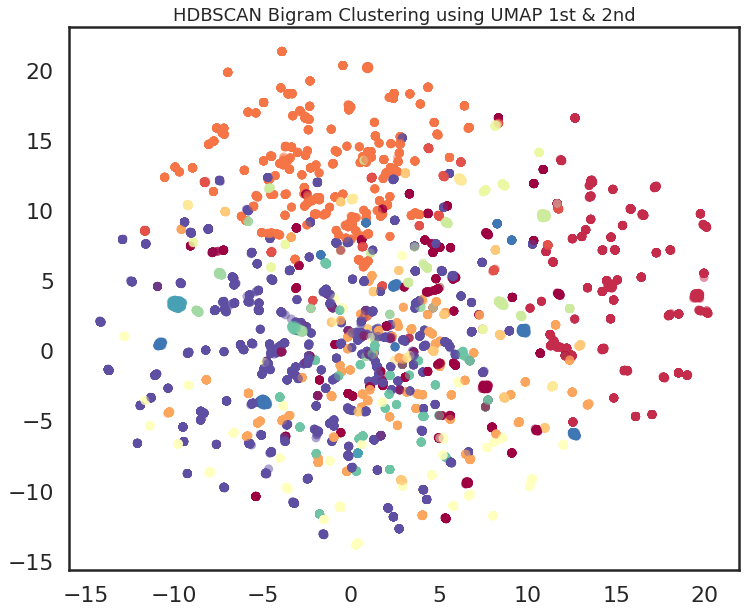

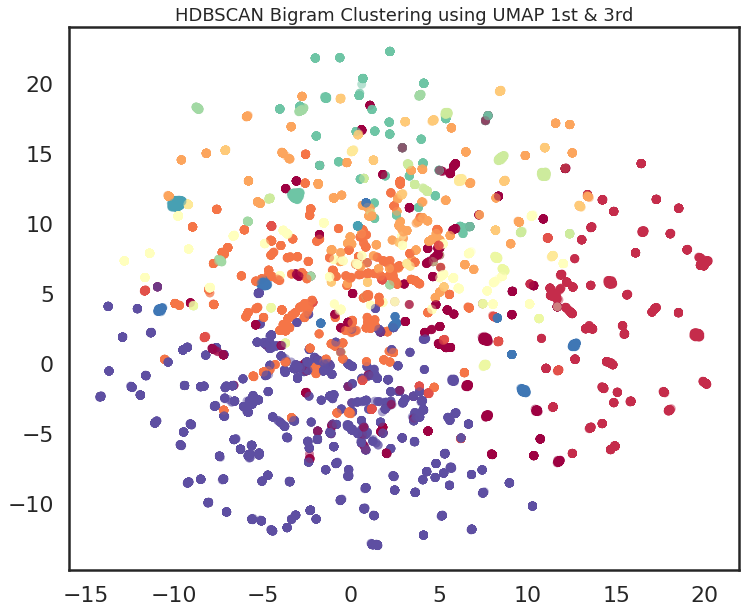

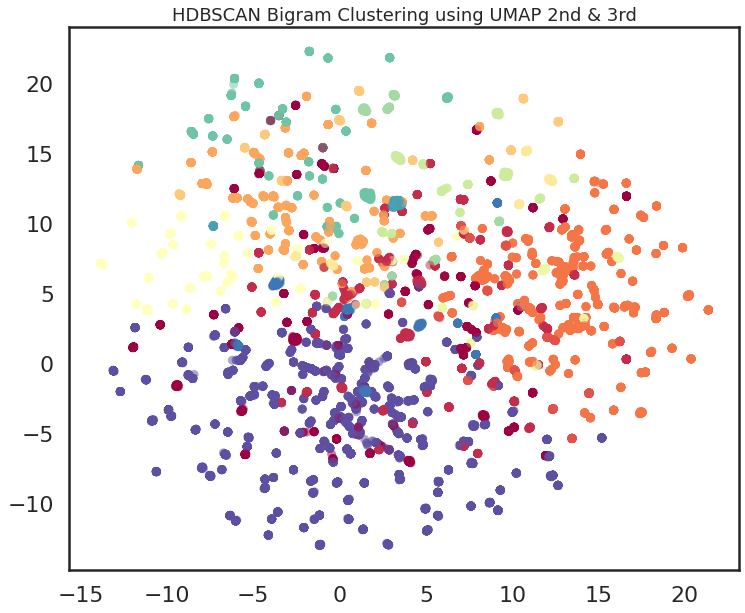

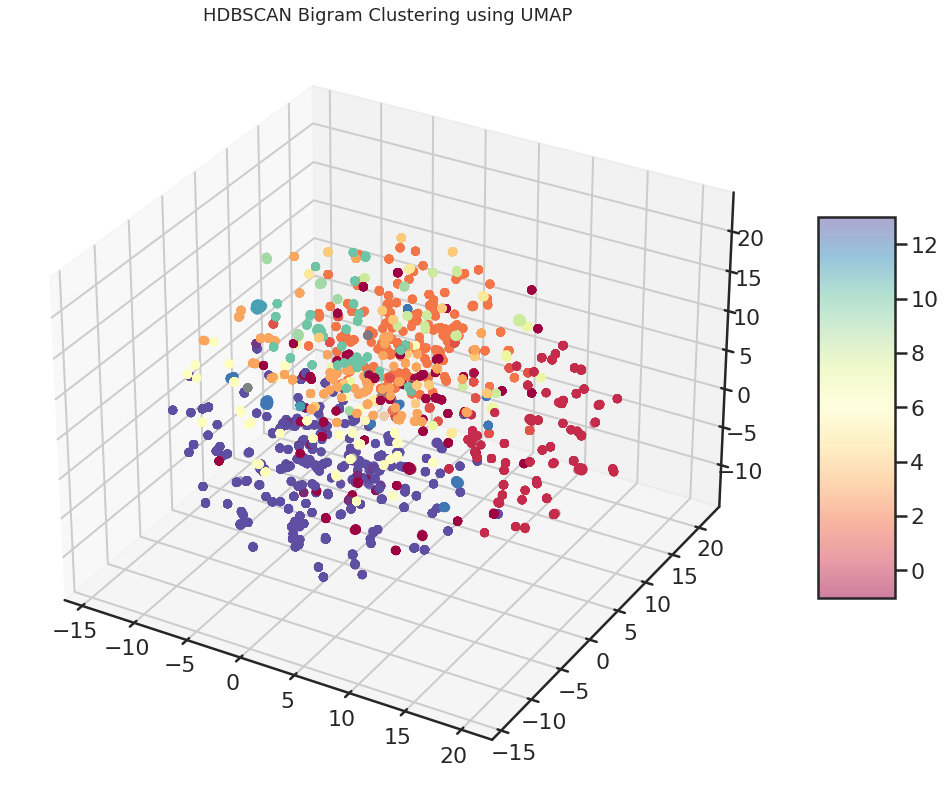

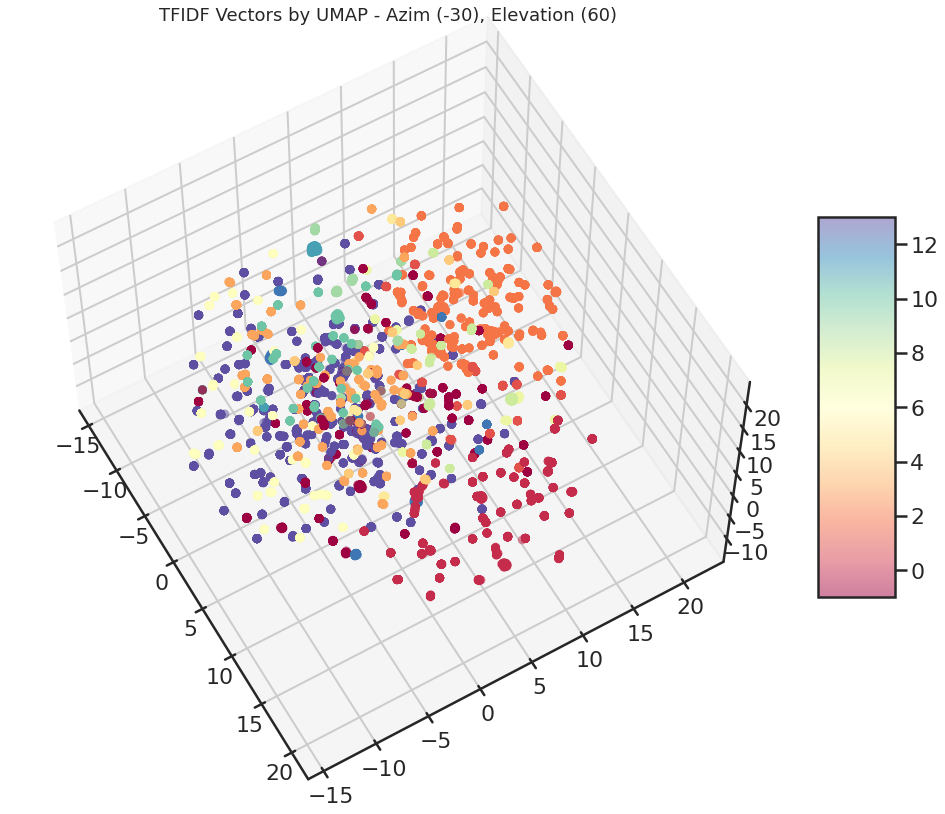

In [12]:
plot_clusters("HDBSCAN Bigram Clustering using UMAP", X, labels)

In [13]:
results = evaluate_clustering('HDBSCAN Bigram Clustering', X, labels_, labels)
print(results)

['HDBSCAN Bigram Clustering', '0.81', '0.76', '0.78', '0.57', '0.78', '0.62']


In [14]:
eval_results.append(results)

## Trigram Feature Vectorizer

In [46]:
labels_ = log_labels

In [22]:
X = get_features(logs, 3, 90)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [23]:
 Y = pairwise_distances(X, metric="cosine")

In [31]:
model = hdbscan.HDBSCAN(min_cluster_size=500,min_samples=100,cluster_selection_epsilon=0.5,
                                        metric="precomputed",algorithm='best')
model.fit(Y)

HDBSCAN(cluster_selection_epsilon=0.5, metric='precomputed',
        min_cluster_size=500, min_samples=100)

In [32]:
labels = model.labels_

In [33]:
lst1 = set(labels)
lst1

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

/home/nk/miniconda3/envs/project/lib/python3.9/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


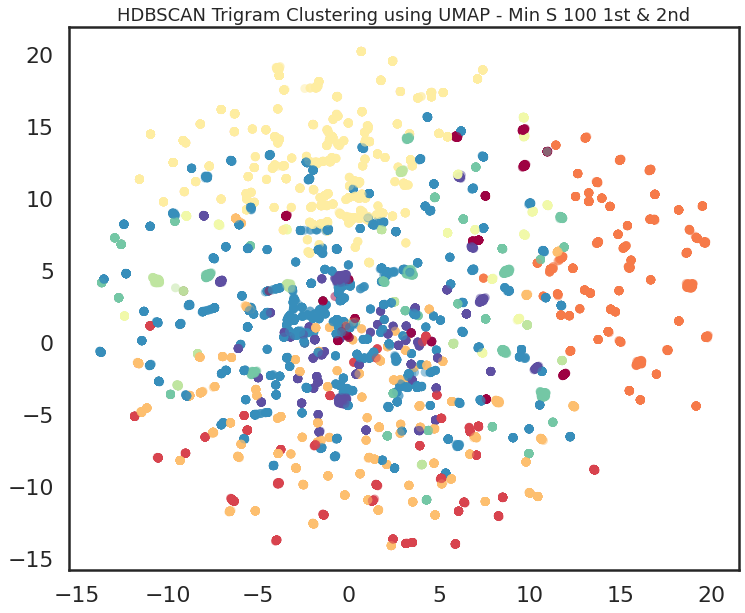

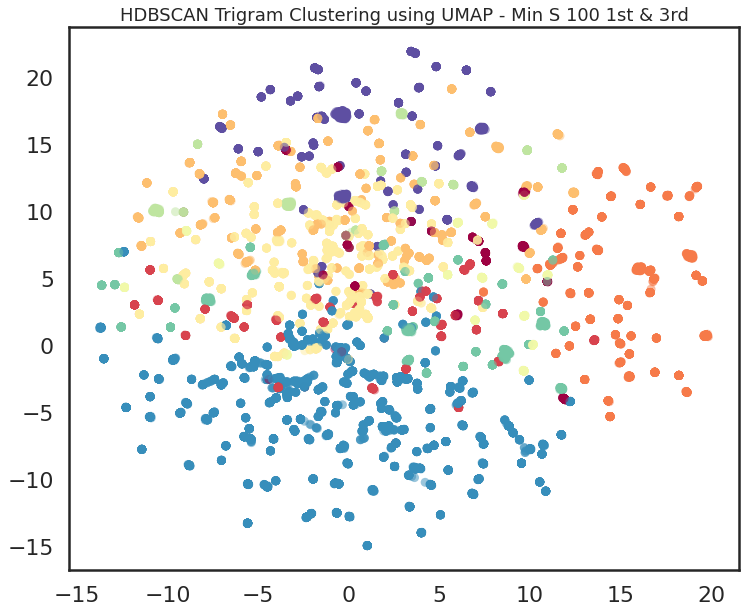

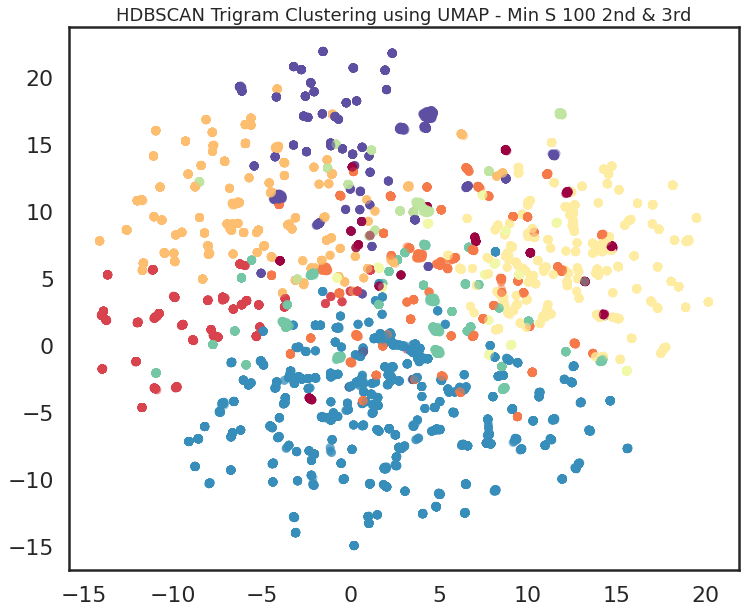

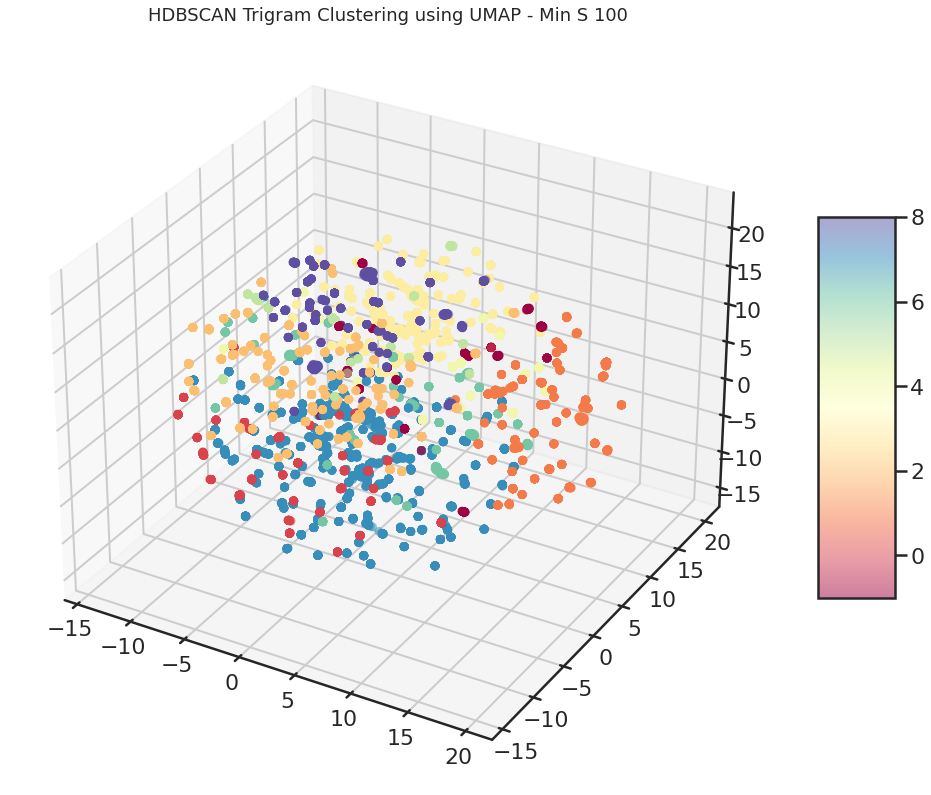

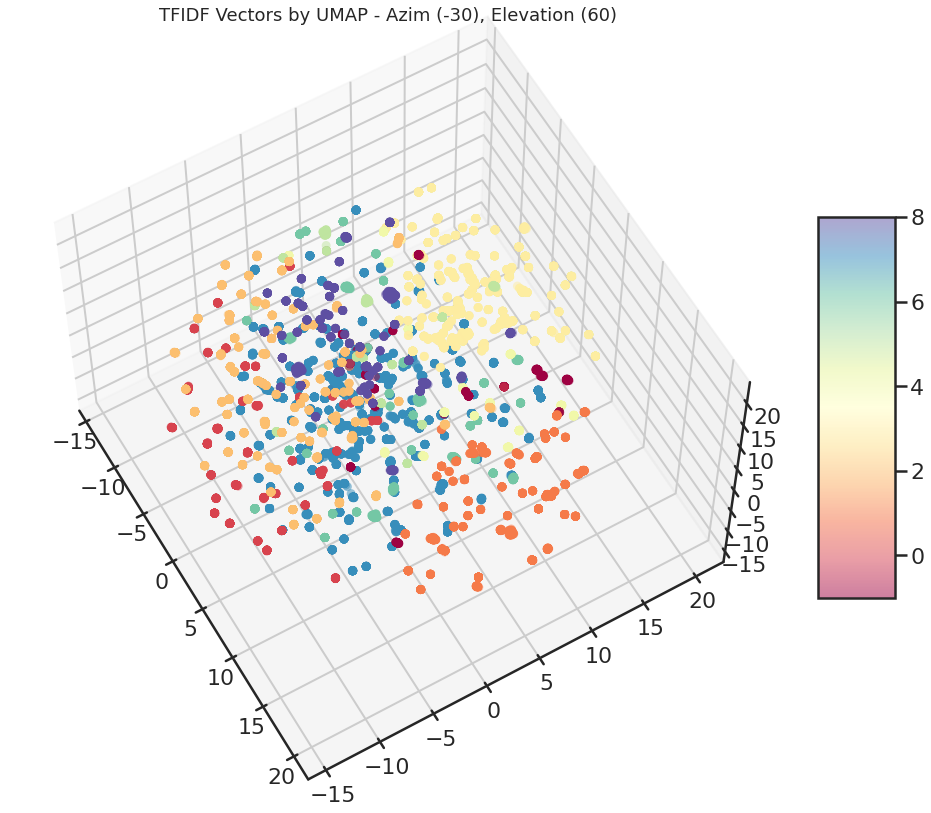

In [34]:
plot_clusters("HDBSCAN Trigram Clustering using UMAP - Min S 100", X, labels)

In [35]:
results = evaluate_clustering('HDBSCAN Trigram Clustering - Min S 100', X, labels_, labels)
print(results)

['HDBSCAN Trigram Clustering - Min S 100', '0.85', '0.91', '0.88', '0.74', '0.88', '0.78']


In [36]:
eval_results.append(results)

<AxesSubplot:ylabel='distance'>

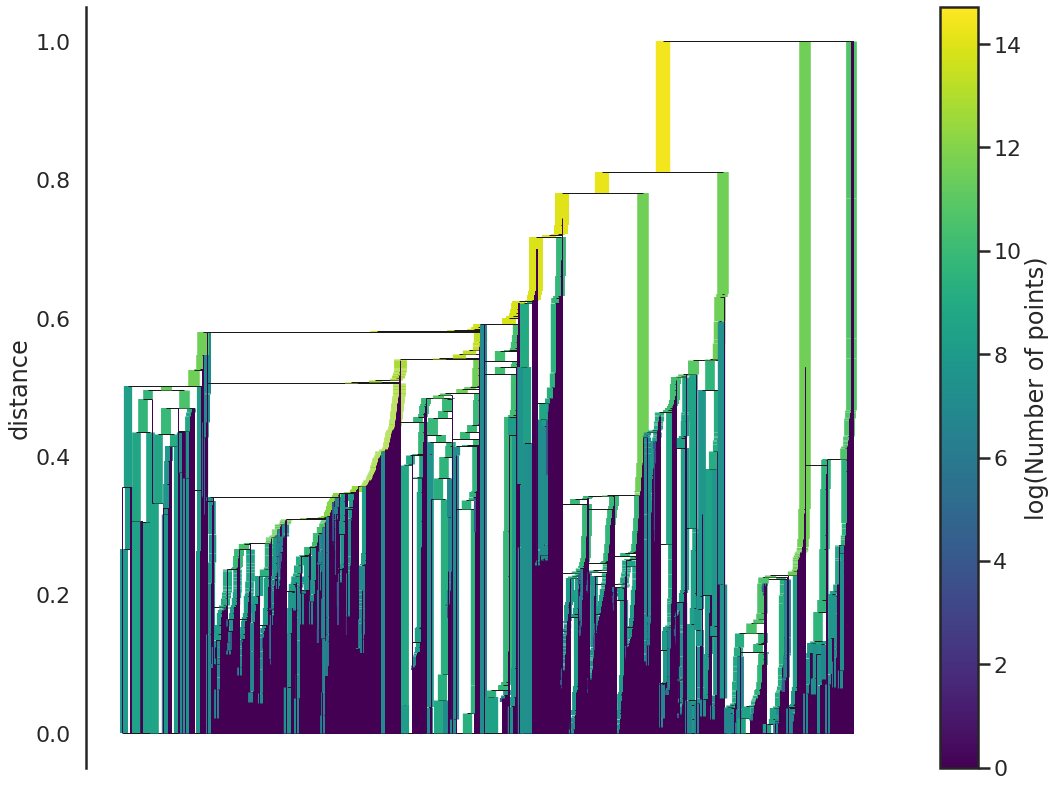

In [39]:
model.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

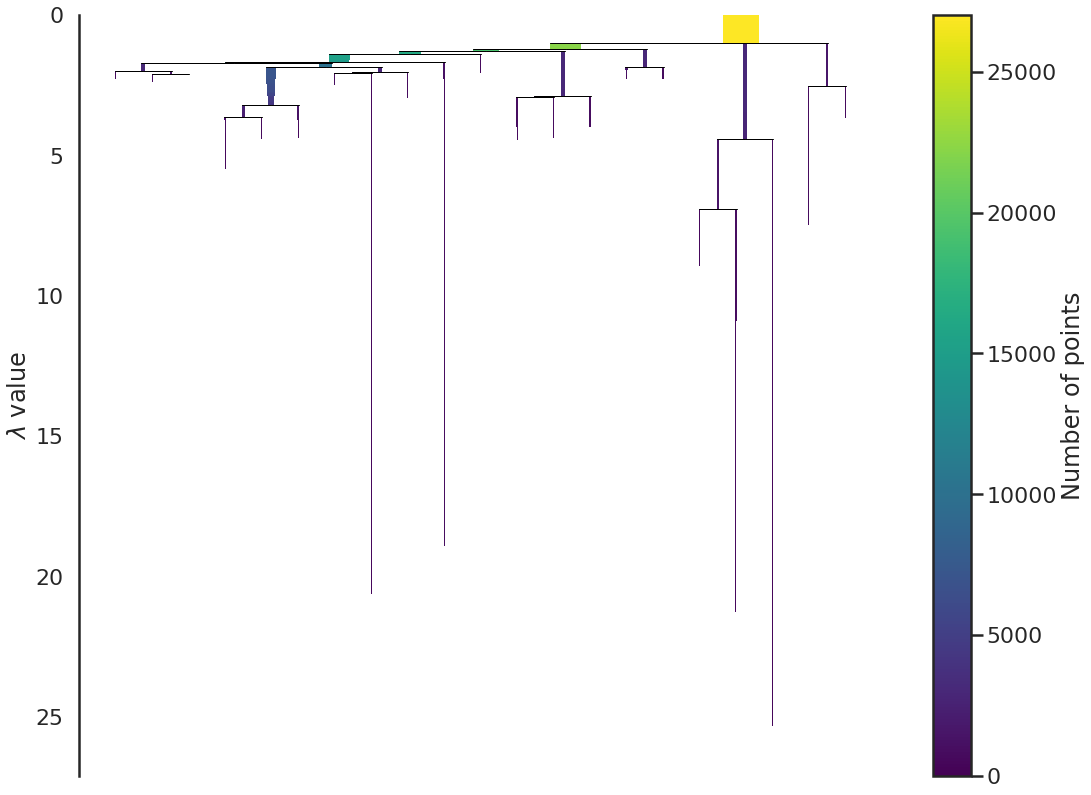

In [40]:
model.condensed_tree_.plot()